# analysis

In [54]:
from ast import literal_eval

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns

In [55]:
df_proc = pd.read_csv('../data/processed.csv')
df_pred = pd.read_csv('../data/scores_2022_1_22.csv', index_col=0)

df = df_proc.merge(df_pred, on='input_name', how='inner')

df

,input_name,igdb_id,steam_id,personal_rating,feat_rating,feat_popularity,feat_tags_meta_2d,feat_tags_meta_3d,feat_tags_meta_action,feat_tags_meta_adventure,...,feat_emb_text_759,feat_emb_text_760,feat_emb_text_761,feat_emb_text_762,feat_emb_text_763,feat_emb_text_764,feat_emb_text_765,feat_emb_text_766,feat_emb_text_767,predicted_rating
0,8Doors: Arum's Afterlife Adventure,137635.0,668550.0,NaN,79,0.17,1,0,1,1,...,-0.013590,-0.066271,0.049260,0.010090,0.003553,0.016597,0.020447,-0.014808,0.007623,3.681503
1,112 Operator,115270.0,793460.0,NaN,87,0.46,1,0,1,0,...,-0.037108,-0.029286,0.030592,-0.012486,-0.021407,-0.041149,-0.010692,0.063817,-0.031678,3.676710
2,140,9497.0,242820.0,NaN,94,0.40,1,0,1,0,...,0.012563,-0.077963,0.024912,-0.002723,0.014076,0.021067,0.035306,0.008275,-0.012206,4.373235
3,ADOM (Ancient Domains Of Mystery),36159.0,333300.0,NaN,89,0.31,1,0,0,1,...,-0.016336,-0.009888,0.033512,0.006399,0.013531,-0.004189,0.016228,0.011230,-0.003493,3.360840
4,AER Memories of Old,11560.0,331870.0,NaN,87,0.49,0,1,1,1,...,-0.024008,-0.026487,0.024519,0.016934,0.032883,0.009610,-0.001042,0.011012,-0.009780,4.577863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2522,Rising Star,187043.0,NaN,NaN,100,0.47,0,0,0,0,...,-0.000096,-0.026348,-0.013423,0.007370,0.016168,-0.007438,-0.004562,0.019040,-0.029706,4.874548
2523,Pilotwings Resort,6862.0,NaN,NaN,80,0.27,0,0,1,0,...,-0.022196,-0.053736,-0.018855,0.020747,0.000257,-0.018210,-0.013590,0.033011,0.018694,3.001871
2524,Etrian Odyssey III: The Drowned City,14718.0,NaN,NaN,90,0.18,0,0,0,1,...,0.000366,-0.019079,0.039726,0.003617,0.048743,-0.026022,0.007757,0.000272,-0.029116,2.984908
2525,Castlevania Requiem: Symphony of the Night & R...,109594.0,NaN,NaN,82,0.27,0,0,1,0,...,0.006968,-0.024475,0.029653,0.014796,-0.057699,0.059840,-0.003632,-0.005901,0.005166,4.131410


In [56]:
df_pred.head(25)

,input_name,predicted_rating
453,The Witcher 3: Wild Hunt - Expansion Pass,6.178587
673,Shadow of the Tomb Raider: Definitive Edition,5.955679
620,Half-Life: Alyx,5.759603
290,Monster Hunter: World,5.744722
391,Sleeping Dogs: Definitive Edition,5.735278
520,Resident Evil Revelations,5.711952
615,NieR:Automata™,5.691927
439,The Elder Scrolls V: Skyrim,5.637162
228,Half-Life 2,5.606262
231,Half-Life 2: Episode Two,5.592804


In [57]:
### Regression Analysis

cols = [col for col in df.columns if 'feat' in col]
X = df[cols]
y = df['predicted_rating']

X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()

w_p = [(name, weight, pvalue) for (name, weight), (_, pvalue) in zip(results.params.items(), results.pvalues.items())]
w_p_sorted = sorted(w_p, key=lambda x: x[2])

#results.summary()

In [58]:
for col, weight, pvalue in w_p_sorted:
    if pvalue <= 0.05:
        print(f'{col}: {weight}, {pvalue}')

feat_tags_meta_open_world_gore: 1.1004004536177079, 0.0002942362453865753
feat_tags_meta_gore_open_world: 1.0916669739999394, 0.0003434993679992192
feat_tags_meta_party_roguelike: -2.5416371995592515, 0.0004350098515229126
feat_tags_meta_roguelike_party: -2.5411756547804227, 0.0004369121796655925
feat_tags_meta_scifi_racing: -0.7124233583744408, 0.0004941609008162929
feat_tags_meta_racing_scifi: -0.7115610003230907, 0.0004978714791608937
feat_tags_meta_scifi_music: 1.37402600507723, 0.000539234913760073
feat_tags_meta_music_scifi: 1.3718386875494015, 0.0005486150440022963
feat_rating: 0.007662542257465679, 0.0006053360480769772
feat_tags_meta_action_adventure: 0.30367527467072547, 0.0006111505008261363
feat_tags_meta_gore_horror: 0.7546044515524652, 0.0006390286703730534
feat_tags_meta_horror_gore: 0.7481860019812273, 0.0007418232038860498
feat_tags_meta_comedy_music: -0.787676350725584, 0.0011613668007063181
feat_tags_meta_music_comedy: -0.7862051487108621, 0.0011777441890948532
feat_

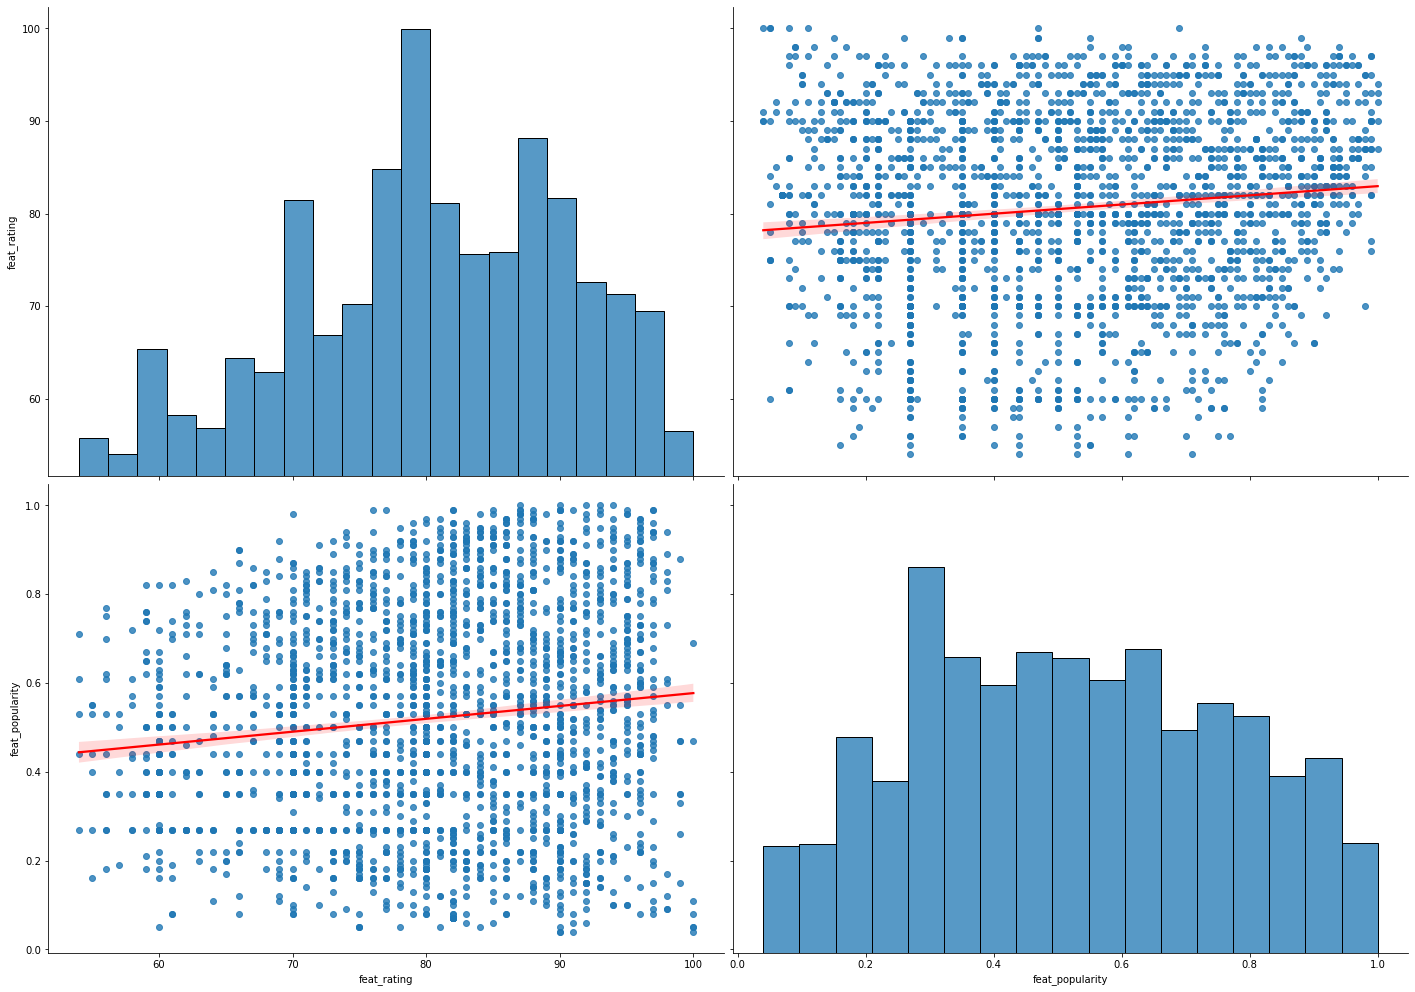

In [59]:
df_chart = df[['feat_rating', 'feat_popularity']]

df_chart = df_chart[np.abs(df_chart-df_chart.mean()) <= (2*df_chart.std())]

sns.pairplot(df_chart, kind="reg", plot_kws={'line_kws':{'color':'red'}}, height=7, aspect=10/7)

In [60]:
### SHAP

import scipy.stats as stats
import shap
from xgboost import XGBRegressor

cols = [col for col in df.columns if 'feat' in col]
X = df[cols]
y = df['predicted_rating']

model = XGBRegressor()
model.fit(X, y)
explainer = shap.TreeExplainer(model)
shap_values = explainer(X)
df_shap = pd.DataFrame(shap_values.values, columns=X.columns)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [61]:
df_shap = pd.DataFrame(shap_values.values, columns=X.columns)

for col, imp in df_shap.abs().mean().sort_values(ascending=False)[:10].items():
    print(f'{col}: {imp:0.3f}')

feat_rating: 0.162
feat_tags_meta_adventure_shooter: 0.023
feat_tags_meta_atmospheric_gore: 0.022
feat_tags_meta_action_adventure: 0.016
feat_tags_meta_fantasy: 0.016
feat_tags_meta_adventure_open_world: 0.015
feat_tags_meta_strategy_turn_based: 0.015
feat_tags_meta_tactical_turn_based: 0.012
feat_tags_meta_action_atmospheric: 0.012
feat_tags_meta_fantasy_open_world: 0.012


In [62]:
corrs = []
for col in X.columns:
    corr, _ = stats.spearmanr(df[col], df_shap[col])
    corr = corr if not np.isnan(corr) else 0
    corrs.append((col, corr))

c_i = [(col, corr, df_shap[col].abs().mean()) for col, corr in corrs if 'text' not in col]
c_i = sorted(c_i, key=lambda x: x[1]*x[2], reverse=True)


An input array is constant; the correlation coefficient is not defined.


In [74]:
for col, corr, shap_imp in c_i[:25]:
    print(f'{col}: {corr:0.3f}//{shap_imp:0.3f}')

feat_rating: 0.730//0.162
feat_tags_meta_fantasy: 0.801//0.016
feat_tags_meta_adventure_shooter: 0.484//0.023
feat_tags_meta_action_adventure: 0.623//0.016
feat_tags_meta_adventure_fantasy: 0.719//0.011
feat_tags_meta_adventure_open_world: 0.501//0.015
feat_tags_meta_strategy_turn_based: 0.504//0.015
feat_tags_meta_atmospheric_gore: 0.317//0.022
feat_tags_meta_action_fantasy: 0.739//0.007
feat_tags_meta_action_atmospheric: 0.398//0.012
feat_tags_meta_fantasy_open_world: 0.327//0.012
feat_tags_meta_atmospheric_open_world: 0.339//0.011
feat_tags_meta_tactical_turn_based: 0.305//0.012
feat_tags_meta_difficult: 0.364//0.008
feat_tags_meta_action_gore: 0.441//0.007
feat_tags_meta_adventure_rpg: 0.673//0.004
feat_tags_meta_action_sword: 0.517//0.005
feat_tags_meta_rts_sports: 0.325//0.006
feat_tags_meta_gore_shooter: 0.320//0.006
feat_tags_meta_adventure_third_person: 0.362//0.004
feat_tags_meta_action_rpg: 0.704//0.002
feat_tags_meta_fantasy_rpg: 0.682//0.002
feat_tags_meta_atmospheric_thir

In [64]:
# Bottom 25
for col, corr, shap_imp in c_i[-10:]:
    print(f'{col}: {corr:0.3f}//{shap_imp:0.3f}')

feat_tags_meta_sandbox_simulation: -0.437//0.001
feat_tags_meta_fantasy_retro: -0.330//0.001
feat_tags_meta_building_sandbox: -0.348//0.002
feat_tags_meta_atmospheric_indie: -0.493//0.001
feat_tags_meta_indie_tactical: -0.311//0.002
feat_tags_meta_sandbox: -0.529//0.002
feat_tags_meta_indie_sandbox: -0.404//0.002
feat_tags_meta_action_simulation: -0.417//0.006
feat_tags_meta_strategy: -0.304//0.009
feat_tags_meta_simulation: -0.536//0.008


In [91]:
for col, corr, mag in c_i:
    if 'action' in col and corr*mag != 0:
        print(f'{col}: {corr:0.3f}//{mag:0.3f}')

feat_tags_meta_action_adventure: 0.623//0.016
feat_tags_meta_action_fantasy: 0.739//0.007
feat_tags_meta_action_atmospheric: 0.398//0.012
feat_tags_meta_action_gore: 0.441//0.007
feat_tags_meta_action_sword: 0.517//0.005
feat_tags_meta_action_rpg: 0.704//0.002
feat_tags_meta_action_horror: 0.347//0.002
feat_tags_meta_action: 0.728//0.001
feat_tags_meta_action_scifi: 0.663//0.000
feat_tags_meta_action_exploration: 0.232//0.000
feat_tags_meta_action_strategy: 0.548//0.000
feat_tags_meta_action_aliens: 0.351//0.000
feat_tags_meta_action_retro: 0.451//0.000
feat_tags_meta_action_anime: -0.455//0.000
feat_tags_meta_action_arcade: -0.371//0.000
feat_tags_meta_action_tactical: -0.378//0.000
feat_tags_meta_action_building: -0.334//0.000
feat_tags_meta_action_simulation: -0.417//0.006


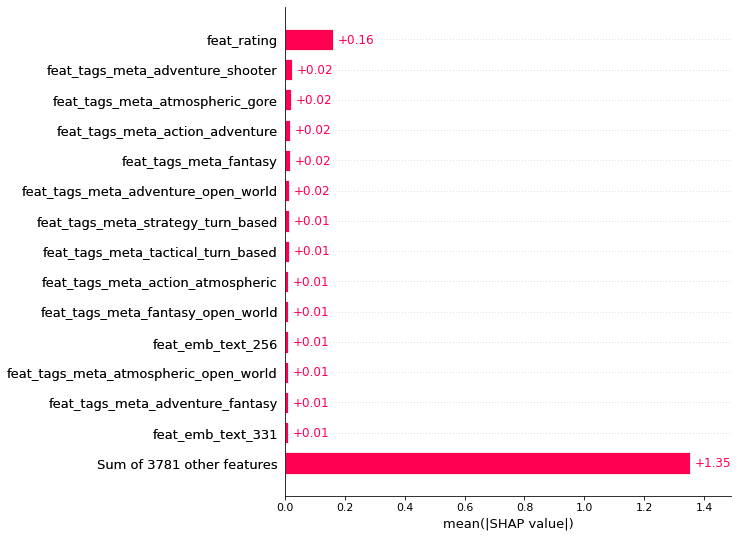

In [ ]:
shap.plots.bar(shap_values, max_display=15)

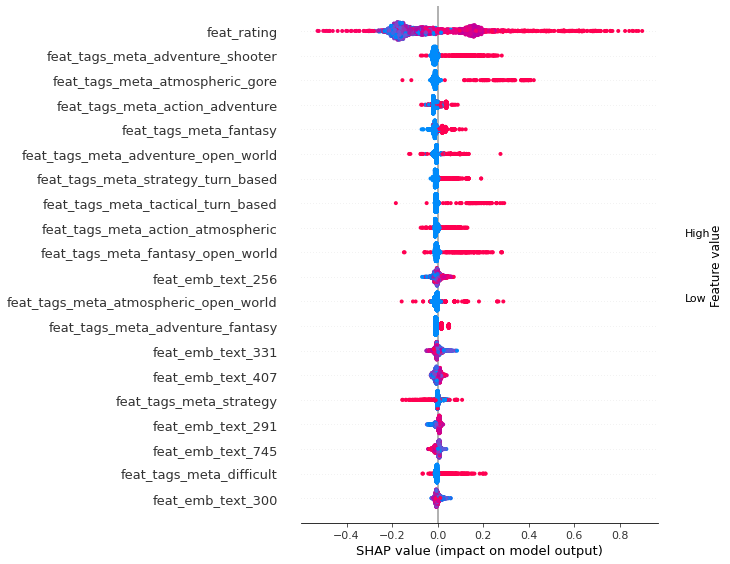

In [ ]:
shap.summary_plot(shap_values, X)

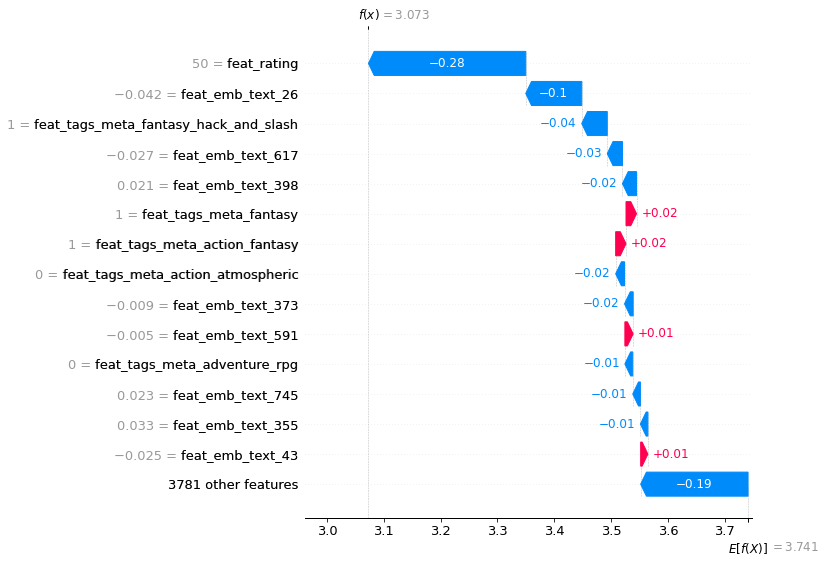

In [ ]:
idx = df[df['input_name'] == 'Dungeons &amp; Dragons: Dark Alliance'].index[0]
shap.plots.waterfall(shap_values[idx], max_display=15)

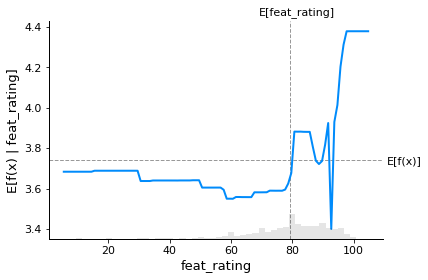

In [ ]:
fig,ax = shap.partial_dependence_plot(
    "feat_rating", model.predict, X, model_expected_value=True,
    feature_expected_value=True, show=False, ice=False,
)

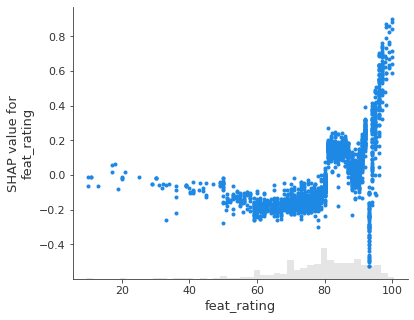

In [ ]:
shap.plots.scatter(shap_values[:,"feat_rating"])

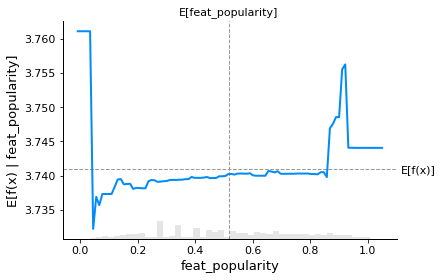

In [ ]:
fig,ax = shap.partial_dependence_plot(
    "feat_popularity", model.predict, X, model_expected_value=True,
    feature_expected_value=True, show=False, ice=False
)

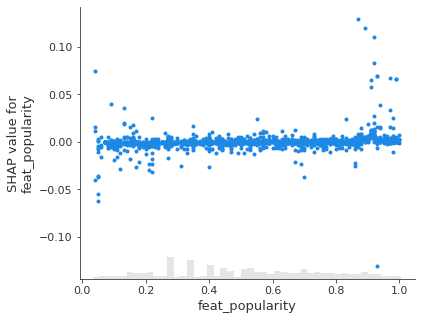

In [ ]:
shap.plots.scatter(shap_values[:,"feat_popularity"])

# Insights From SHAP
- Rating is overwhelmingly the most important feature. Generally above 80% means like and below 80% means dislike
- Like Fantasy games
- Like Adventure games
- Like Atmospheric games
- I like most action games, except I dislike action games that overly strive for realism (I suspect it is because they sacrifice "fun" to make it more accurate)
- I like scary shooters (I'd guess this is just learning that I like resident evil games)
- Dislike most Strategy games except when they are tactical turn-based games like Gears Tactics.
- Dislike Sandbox games
- Dislike Simulation games